##############
  PROBLEMA 1  
##############

### EJERCICIO 1.b ###

[Cuad.  GL] con 5 puntos: T ≈ 1.7423988227627665

### EJERCICIO 1.c ###



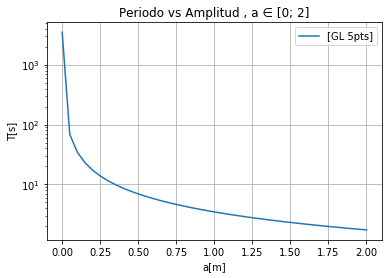

##############
  PROBLEMA 2  
##############

### EJERCICIO 2.b ###



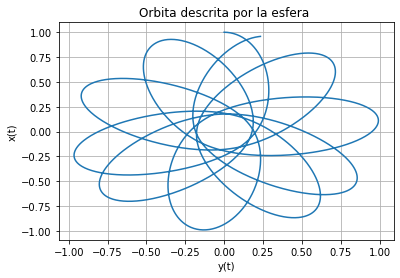

##############
  PROBLEMA 3  
##############

### EJERCICIO 3.a ###

para L=2


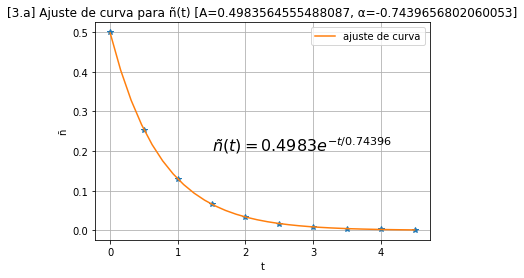


### EJERCICIO 3.b ###

Ahora, para L=4


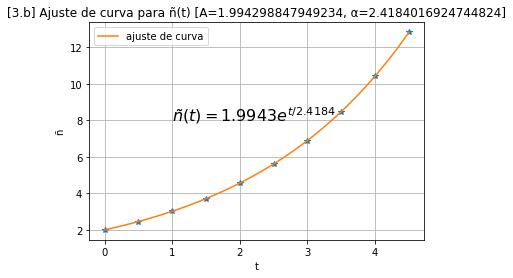

[OBS]: el cambio en el orden del eje ñ depende de los 10 valores aleatorios elegidos anteriormente

### EJERCICIO 3.c ###

¿Son las graficas de  ̄n vs t las mismas para L = 4 y L = 2? Las gráficas no son las mismas
Debido a que el único parámetro cambiado es L, y este solo afecta a la densidad
en el tiempo t=0 (condiciones iniciales) se podría pensar que el comportamiento
de la densidad está fuertemente ligado a las condiciones iniciales. 
Sin embargo, a partir de los cálculos también podría concluirse que la densidad de neutrones aumenta
al aumentar la amplitud generando un cambio brusco en algún punto entre L=2 y L=4
>>>FIN


In [4]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show

from matplotlib.pyplot import figure

from Chira_modulo import *

import warnings
warnings.filterwarnings("ignore")


#######################
#######################
#######################
print("##############")
print("  PROBLEMA 1  ")
print("##############")

#
##
###
print("")
print("### EJERCICIO 1.b ###")
print("")

def f12_periodo(a,x): #periodo para m=1
#     a = 2 #Amplitud
    Va = a**4 #V(a)
    Vx = x**4 #V(x)
    return (8**0.5)/((Va-Vx)**0.5)
 
n=5
print("[Cuad.  GL] con",n,"puntos: T \u2248",cuad_GL_var(f12_periodo,0,2,n))

##
print("")
print("### EJERCICIO 1.c ###")
print("")

xs13,ts13 = recurr_GL(0,2,5,f12_periodo)   #regresa los x=a[0,2] y los periodos respectivos

#extrayendo los valores a graficar
m=len(xs13)
n=int(m/2)
graf_x=xs13[n:m]
graf_t=ts13[n:m]

#graficando
plt.plot(graf_x,graf_t,label="[GL 5pts]")
plt.legend()
plt.title('Periodo vs Amplitud , a \u2208 [0; 2]')
plt.ylabel("T[s]")
plt.xlabel("a[m]")
plt.yscale('log')
plt.grid()
plt.show()


#
##
###
#######################
#######################
#######################
print("##############")
print("  PROBLEMA 2  ")
print("##############")

##
print("")
print("### EJERCICIO 2.b ###")
print("")

#Condiciones: inicial y de rango [r_a,r_b]
conds_t0=[1,0,1,0]
a2b=0
b2b=10

h2b=0.005 #paso 

###
#Sist de EDO's del problema
def fwdt(x,y,G,M,L):
    r2 = (x**2)+(y**2) 
    
    dwdt = -G*M*x/( r2*((r2 + (L/2)**2 )**0.5) )
    
    return  dwdt

def fgdt(x,y,G,M,L):
    r2 = (x**2)+(y**2) 
    
    dgdt = -G*M*y/( r2*((r2 + (L/2)**2 )**0.5) )
    
    return  dgdt

def fxdt(w): #no es necesario pero es usado para seguir con la nomenclatura de la funcion
    return w

def fydt(g):
    return g

def F2b(t,r): #r:vector que contiene las condiciones iniciales
              #r=[x,y,g,w]
    #constantes del problema
    L = 2
    G = 1
    M = 10
    
    F=array([fxdt(r[3]),fydt(r[2]),fgdt(r[0],r[1],G,M,L),fwdt(r[0],r[1],G,M,L)],float64)
    
    return F #la funcion retorna un vector con todas las soluciones
###

###    METODO DE Rk4
#datos:
tsRK4,rRK4=sists_RK4(a2b,b2b,conds_t0,F2b,h2b)#rRK4 es un vector que contiene a los vects xyz: rk4=(x,y,g,w)

#graf: x(t) vs y(t)
plt.plot(rRK4[1],rRK4[0])
plt.ylabel("x(t)")
plt.xlabel("y(t)")
plt.grid()
plt.title('Orbita descrita por la esfera ')
plt.show()



#
##
###
#######################
#######################
#######################
print("##############")
print("  PROBLEMA 3  ")
print("##############")

##
print("")
print("### EJERCICIO 3.a ###")
print("")

print("para L=2")
#Funciones dato del problema 3
def f_interior(L,x):#funcion en el interior en el tiempo t=0
    return -(x**2)+(L**2)/4

def cis(cdextr_a,cdextr_b,x,L):#retorna un vector con todas las condiciones iniciales
    
    Ti=[]
    Ti.append(cdextr_a)    #condicion en el extremo -L/2
    
    T=f_interior(L,x)
    m=len(T)
    for j in range(1,m-1): #condiciones iniciales para el interior
        temp=T[j]
        Ti.append(temp)
        
    Ti.append(cdextr_b) #condicion en el extremo L/2
    
    return Ti

def n_hat(T):
    n=len(T[0]) #todos los elementos tienen el mismo nro de datos
    lim=len(T)
    n_hat=[]
    for i in range (lim):
        temp1=0
        temp1=sum(T[i])
        temp= temp1/n
        n_hat.append(temp)
        
    return n_hat

#L:dato
L1=2

#rango de x [-L/2,L/2]
ax_3a=-(L1)/2
bx_3a=(L1)/2

#(con la funcion "cis")creamos el vector de condiciones inciales respectivo
n=5
x=linspace(ax_3a,bx_3a,n)
Ti=cis(0,0,x,L1)
alfa=1 #dato D=alfa

#hallamos las soluciones con FTCS
xs3,ts3,Ts3=FTCS_elipticas(alfa,1,0.0005,0.5,0,5,ax_3a,bx_3a,Ti,0,0)


hats1=n_hat(Ts3)#lista de valores de donde elegiremos 10 puntos


#elegimos 10 valores entre [0,5]
lim_t=len(ts3)
rango10=[]
hats10=[]

for i in range(0,lim_t-1,1000):    
    #se eligen 10 ts
    temp0=ts3[i]
    rango10.append(temp0)
    
    #se eligen 10 n_hats
    temp1=hats1[i]
    hats10.append(temp1)
    
    
#convertimos las listas a array para poder hacer operaciones con sus elementos
nhat_arr=array(hats10)
rango10_arr=array(rango10)
    
##
#Ahora, realizamos la linealización para poder ajustar la curva a la ecuación dada:
#ln(ñ)=ln(A)+t*inv_alfa     , con inv_alfa=1/alfa
nhat_lin=log(nhat_arr)
a30,a31=coeficientes_linreg(rango10_arr,nhat_lin)#halla los coefs de la ecuacion f= a0 + a1x
 
#de la linealizacion: a30 = ln(A)  ,  a31=inv_alfa
A=exp(a30)
alfa_r=1/(a31)

#creando espacio para graficar la funcion obtenida
nro3_elementos=len(rango10_arr)
x3prueba=linspace(rango10_arr[0],rango10_arr[nro3_elementos-1],30) #30 pts solo para observar una curva suave, nada especial

#usando los puntos en la funciona
f3_afterlin=A*exp(x3prueba/alfa_r)

plt.plot(rango10,hats10,'*')
plt.plot(x3prueba,f3_afterlin,label="ajuste de curva")
plt.legend()
plt.grid()
plt.ylabel("ñ")
plt.xlabel("t")
add_titulo=str(A)+", \u03B1="+str(alfa_r)+"]"
plt.title('[3.a] Ajuste de curva para ñ(t) [A='+add_titulo)
plt.text(1.5,0.2, r'$ñ(t)=0.4983e^{-t/0.74396}$', fontsize=16) 
plt.show()

##
print("")
print("### EJERCICIO 3.b ###")
print("")

print("Ahora, para L=4")

#cambiando el valor de L
L2=4

#rango de x [-L/2,L/2]
ax_3b=-(L2/2)
bx_3b=(L2/2)

#y creando el vector de condiciones iniciales respectivo
n2=5
x3b=linspace(ax_3b,bx_3b,n2)
Ti2=cis(0,0,x3b,L2)

#hallamos las soluciones con FTCS
xs32,ts32,Ts32=FTCS_elipticas(alfa,1,0.0005,1,0,5,ax_3b,bx_3b,Ti2,0,0)


hats12=n_hat(Ts32)#lista de valores de donde elegiremos 10 puntos

#elegimos 10 valores entre [0,5]
lim_t2=len(ts32)
rango102=[]
hats102=[]

for i in range(0,lim_t2-1,1000):    
    #se eligen 10 ts
    temp02=ts32[i]
    rango102.append(temp02)
    
    #se eligen 10 n_hats
    temp12=hats12[i]
    hats102.append(temp12)
    

#convertimos las listas a array para poder hacer operaciones con sus elementos
nhat_arr2=array(hats102)
rango10_arr2=array(rango102)
    
##
#Ahora, realizamos la linealización para poder ajustar la curva a la ecuación dada:
#ln(ñ)=ln(A)+t*inv_alfa     , con inv_alfa=1/alfa
nhat_lin2=log(nhat_arr2)
a302,a312=coeficientes_linreg(rango10_arr2,nhat_lin2)#halla los coefs de la ecuacion f= a0 + a1x

 

#de la linealizacion: a30 = ln(A)  ,  a31=inv_alfa
A2=exp(a302)
alfa_r2=1/(a312)

#creando espacio para graficar la funcion obtenida
nro3_elementos2=len(rango10_arr2)
x32prueba=linspace(rango10_arr2[0],rango10_arr2[nro3_elementos-1],30) #30 pts solo para observar una curva suave, nada especial

#usando los puntos en la funciona
f32_afterlin=A2*exp(x32prueba/alfa_r2)

plt.plot(rango102,hats102,'*')
plt.plot(x32prueba,f32_afterlin,label="ajuste de curva")
plt.ylabel("ñ")
plt.xlabel("t")
plt.legend()
plt.grid()
add_titulo2=str(A2)+", \u03B1="+str(alfa_r2)+"]"
plt.title('[3.b] Ajuste de curva para ñ(t) [A='+add_titulo2)
plt.text(1,8, r'$ñ(t)=1.9943e^{t/2.4184}$', fontsize=16) 
plt.show()
print("[OBS]: el cambio en el orden del eje ñ depende de los 10 valores aleatorios elegidos anteriormente")

##
print("")
print("### EJERCICIO 3.c ###")
print("")
print("¿Son las graficas de  ̄n vs t las mismas para L = 4 y L = 2? Las gráficas no son las mismas")
print("Debido a que el único parámetro cambiado es L, y este solo afecta a la densidad")
print("en el tiempo t=0 (condiciones iniciales) se podría pensar que el comportamiento")
print("de la densidad está fuertemente ligado a las condiciones iniciales. ")
print("Sin embargo, a partir de los cálculos también podría concluirse que la densidad de neutrones aumenta")
print("al aumentar la amplitud generando un cambio brusco en algún punto entre L=2 y L=4")

print(">>>FIN")